# Wine Project - Finding Drivers Of Wine Quality

# Goal

- Identify Key Features: Determine the features within the dataset that exhibit strong relationship with quality of wine.
- Build Predictive Model: Develop a model that can accurately predict wine quality based on the selected features utilizing clusters

- Share Insights: Communicate the findings and model insights to the California Wine Institute data science team   supply chain marketing. for further analysis and decision-making.



# Import

In [1]:
#import libraries
import wrangle_wine as w
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import explore as e
import model as m 
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import scipy.stats as stats
from scipy.stats import  chi2_contingency
from scipy.stats import ttest_ind
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Acquire


- Data acquired from Data.World Wine Quality Dataset(https://data.world/food/wine-quality/activity)
- Data set has 13 columns and 6,497 rows before cleaning
- Each row represents a unique wine
- Each column represents wine feature


#  Prepare

### Prepare Actions:

- Renamed columns to promote readability
- Checked for nulls in the data, there are no nulls
- Data type didin't need adjustments
- Outliers  removed
- Encode categorical variables
- Split data into train, validate and test (approx. 50/30/20)
- Added column strain , which identifies if the wine is red or white

- Scaled appropriate features



## Data Dictionary  



### Data Used
---

| Attribute           | Definition                                      | Data Type |
|---------------------|-------------------------------------------------|-----------|
| fixed acidity       | Amount of non-volatile acids in a substance    | float     |
| volatile acidity    | Amount of volatile acids in a substance        | float     |
| citric acid         | Amount of citric acid in a substance           | float     |
| residual sugar      | Amount of residual sugar in a substance        | float     |
| chlorides           | Concentration of chlorides in a substance      | float     |
| free sulfur dioxide | Level of free sulfur dioxide in a substance    | float     |
| total sulfur dioxide| Total sulfur dioxide content in a substance    | float     |
| density             | The density of a substance                     | float     |
| pH                  | The pH level of a substance                    | float     |
| sulphates           | Amount of sulfates in a substance              | float     |
| proof               | Twice the percentage of alcohol by volume      | float     |
| quality             | The quality rating of a substance              | float     |
| strain              | Type of wine                                   | object    |

-  This data dictionary provides a clear description of each attribute, its definition, and the data type associated with each attribute. The data types are represented as "float" for numerical values and "object" for categorical values.

## Quick Data Preview

In [2]:
# split data into train, validate and test
train, validate, test = w.wrangle_wine()

In [3]:
# this previews the training data
train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,quality_bin,strain_red,strain_white
3337,7.5,0.15,0.38,1.8,0.054,19.0,101.0,0.99460,3.24,0.44,10.0,5,white,0,0,1
2609,7.6,0.16,0.44,1.4,0.043,25.0,109.0,0.99320,3.11,0.75,10.3,6,white,0,0,1
5238,6.7,0.13,0.32,3.7,0.017,32.0,99.0,0.99348,3.12,0.44,10.0,6,white,0,0,1
3985,6.9,0.30,0.29,1.3,0.053,24.0,189.0,0.99362,3.29,0.54,9.9,4,white,0,0,1
1399,7.2,0.67,0.00,2.2,0.068,10.0,24.0,0.99560,3.42,0.72,11.1,6,red,0,1,0


In [4]:
#splits into scaled data
train_scaled, validate_scaled, test_scaled = w.scale_data(train, validate, test)

In [5]:
# previews train scaled data
train_scaled.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,strain,quality_bin,strain_red,strain_white
3337,0.305785,0.052209,0.228916,0.018405,0.067002,0.123711,0.315091,0.144399,0.393701,0.125000,0.289855,5,white,0,0,1
2609,0.314050,0.060241,0.265060,0.012270,0.048576,0.164948,0.341625,0.117409,0.291339,0.301136,0.333333,6,white,0,0,1
5238,0.239669,0.036145,0.192771,0.047546,0.005025,0.213058,0.308458,0.122807,0.299213,0.125000,0.289855,6,white,0,0,1
3985,0.256198,0.172691,0.174699,0.010736,0.065327,0.158076,0.606965,0.125506,0.433071,0.181818,0.275362,4,white,0,0,1
1399,0.280992,0.469880,0.000000,0.024540,0.090452,0.061856,0.059701,0.163678,0.535433,0.284091,0.449275,6,red,0,1,0


## Data Summary

In [6]:
# provides a quick description of the data
train.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,proof,quality,quality_bin,strain_red,strain_white
count,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000,2979.000000
mean,7.185347,0.343679,0.312843,5.057033,0.056383,30.046828,113.733635,0.994528,3.230232,0.533118,10.544480,5.797919,0.185633,0.253441,0.746559
std,1.292829,0.166998,0.147245,4.546493,0.036324,17.296293,55.913432,0.002971,0.161362,0.148498,1.187491,0.872755,0.388875,0.435054,0.435054
min,3.800000,0.085000,0.000000,0.600000,0.014000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000,3.000000,0.000000,0.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,17.000000,74.500000,0.992300,3.120000,0.430000,9.500000,5.000000,0.000000,0.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994600,3.220000,0.510000,10.300000,6.000000,0.000000,0.000000,1.000000
75%,7.700000,0.410000,0.390000,7.400000,0.066000,41.000000,153.000000,0.996730,3.340000,0.600000,11.400000,6.000000,0.000000,1.000000,1.000000
max,15.900000,1.330000,1.660000,65.800000,0.611000,146.500000,307.500000,1.038980,4.010000,1.980000,14.900000,9.000000,1.000000,1.000000,1.000000


# Explore

In [7]:
# assign data frame to df variable
df = train

Text(0.5, 1.0, 'Heat Plot')

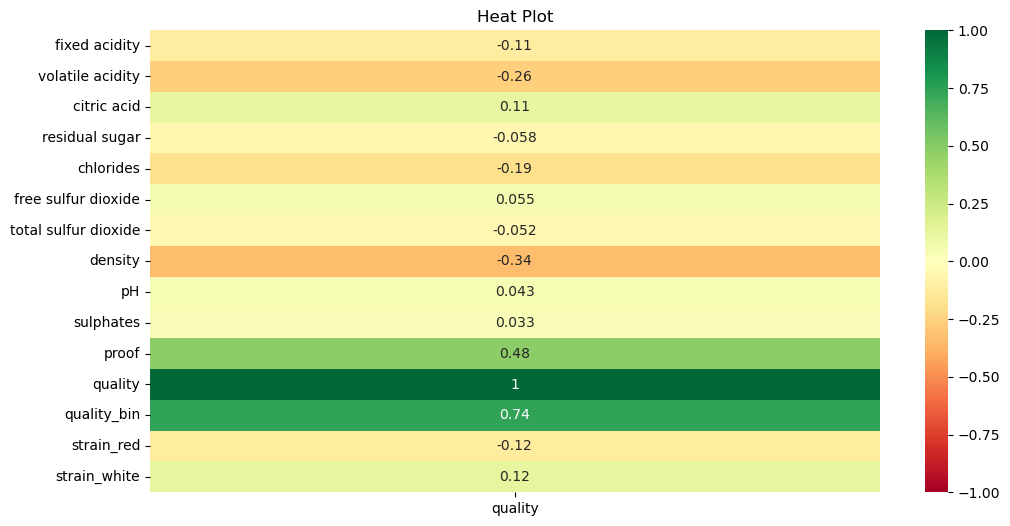

In [8]:
plt.figure(figsize=(40, 6))


plt.subplot(132)
sns.heatmap(train.corr()[['quality']], cmap = 'RdYlGn', vmin = -1, vmax = 1, annot = True,)
plt.title('Heat Plot')

- Three features found to be the strongest drivers of quality of wine were  proof, citric acid and free sulfur dioxide.

- These features  have a medium to high correlation  with quality of wine 

## Stats Testing Selected Features Using PearsonsR

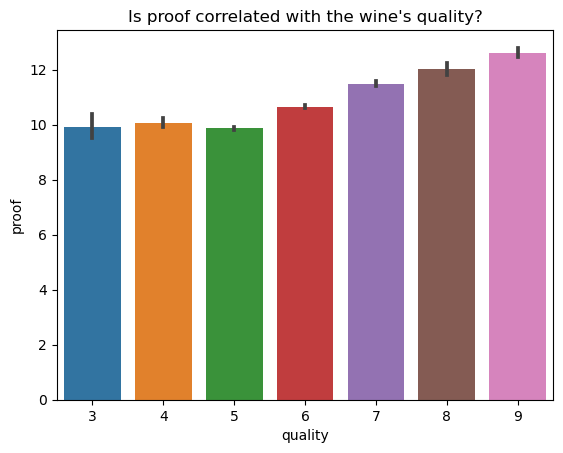

In [9]:
sns.barplot(x=train.quality, y=train.proof)
plt.title("Is proof correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("proof")
plt.show()

- Visual it seems as the proof of the wine increases so does the quality

#### I will now use a Pearsons R test to investigate whether proof and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### $H_{0}$: proof and quality are not correlated.
#### $H_{a}$: proof and quality are correlated.

In [10]:
# sets alpha
alpha = 0.05
proof = train['proof']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.4806700681237368
p-value:  4.439061886953334e-172


In [11]:
p_value < alpha

True

####  We can reject the null hypothesis

### Is citric acid correlated with the wine's quality?

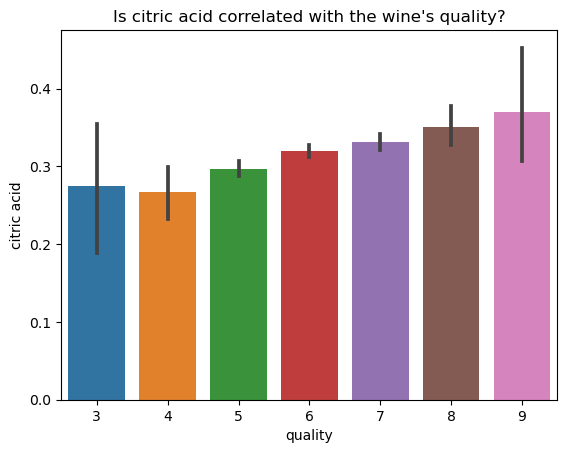

In [12]:
sns.barplot(x=train.quality, y=train['citric acid'])
plt.title("Is citric acid correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("citric acid")
plt.show()

- Visually we can see that the quality is much higher the more citric acid that the wine contains

#### I will now use a Pearsons R test to investigate whether citric acid and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### $H_{0}$: citric acid and quality are not correlated.

#### $H_{a}$: citric acid and quality are correlated.

In [13]:
# sets alpha
alpha = 0.05
proof = train['citric acid']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.11225955145615578
p-value:  8.046463019989137e-10


In [14]:
p_value < alpha

True

#### We can reject the null hypothesis

### Is free sulfur dioxide correlated with the wine's quality?

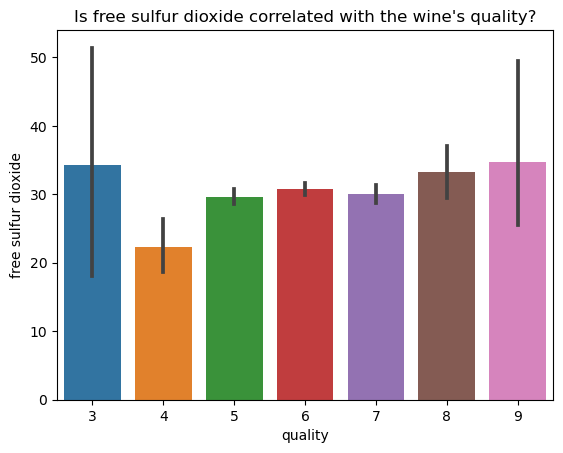

In [15]:
sns.barplot(x=train.quality, y=train['free sulfur dioxide'])
plt.title("Is free sulfur dioxide correlated with the wine's quality?")
plt.xlabel("quality")
plt.ylabel("free sulfur dioxide")
plt.show()

- Looking at this barplot it looks like the highest free sulfur dioxide, and the lowest, obtain higher quality scores

#### I will now use a Pearsons R test to investigate whether proof and quality of the wine are correlated.

- I will use a confidence interval of 95%
- The resulting alpha is .05
#### $H_{0}$: free sulfur dioxide and quality are not correlated.
#### $H_{a}$: free sulfur dioxide and quality are correlated.

In [16]:
# sets alpha
alpha = 0.05
proof = train['free sulfur dioxide']
quality = train['quality']

# Perform Pearson's correlation test
correlation, p_value = pearsonr(proof, quality)

# Print the correlation coefficient and p-value
print("Pearson's correlation coefficient: ", correlation)
print("p-value: ", p_value)

Pearson's correlation coefficient:  0.055471815658097244
p-value:  0.0024558802131494175


In [17]:
p_value < alpha

True

## Exploration Summary
Proof, citric acide and free sulfur dioxide were each found to be drivers of "quality"

- Revisisting data for more reasonable number features in future especially with stronger correlations

* All columns were found to be drivers of the quality

## Features moving forward for modeling

- Proof will be moving forward.
- Citric acid will be moving forward.
- Free sulfur dioxide will be moving forward.


## Features not moving forward for modeling

No features left out for modeling

## Modeling

- I will use accuracy as my evaluation metric
- by guessing quality for every wine, one could achieve an accuracy of 45%. 
- 45% will be the baseline accuracy I use for this project
- I will be evaluating top 3 models developed out of 36 different classification models.
- Models will be evaluated on train and validate data 
- The model that performs the best will then be evaluated on test data
- Data for split will be scaled.

In [18]:
k_values = [3, 4, 5, 6]

for k in k_values:
    
    kmeans = KMeans(n_clusters=k, random_state=123)
    

    train[f'cluster_k{k}'] = kmeans.fit_predict(train.drop(columns=['fixed acidity', 'volatile acidity', 'residual sugar',
       'chlorides', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'quality', 'strain', 'quality_bin',
       'strain_red', 'strain_white'],))

### Baseline

In [19]:
majority_class = train['quality'].value_counts().idxmax()
majority_count = train['quality'].value_counts().max()


total_instances = len(train['quality_bin'])


baseline_accuracy = majority_count / total_instances

results_df = pd.DataFrame(columns=['Cluster_Column', 'Train_Accuracy', 'Validation_Accuracy'])
results_df = results_df.append({'Cluster_Column': 'Baseline',
                                'Train_Accuracy': baseline_accuracy,
                                'Validation_Accuracy':'n/a',
                               'Score_Diff': 0},
                               ignore_index=True)

In [20]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.0


### 3 Feature LogisticRegression (LogReg)

In [21]:
X = train[['proof', 'citric acid','free sulfur dioxide']]
y = train['quality']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)



results_df = results_df.append({'Cluster_Column': '3 feature LogReg',
                                'Train_Accuracy': train_accuracy,
                                'Validation_Accuracy': val_accuracy,
                               'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                               ignore_index=True)

In [22]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01


### cluster_k6 with proof, free sulfur dioxide, citric acid LogReg

In [23]:

X = train[['proof', 'citric acid','free sulfur dioxide', 'cluster_k6']]
y = train['quality']

   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

results_df = results_df.append({'Cluster_Column': 'cluster_k6 with proof, free sulfur dioxide, citric acid LogReg',
                                    'Train_Accuracy': train_accuracy,
                                    'Validation_Accuracy': val_accuracy,
                                   'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                                   ignore_index=True)

In [25]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01
2,"cluster_k6 with proof, free sulfur dioxide, citric acid LogReg",0.528745,0.525168,0.00


### cluster_k5 with proof, free sulfur dioxide, citric acid LogReg

In [26]:

X = train[['proof', 'citric acid','free sulfur dioxide', 'cluster_k5']]
y = train['quality']

   
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
model = LogisticRegression(random_state=123)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

results_df = results_df.append({'Cluster_Column': 'cluster_k5 with proof, free sulfur dioxide, citric acid LogReg',
                                    'Train_Accuracy': train_accuracy,
                                    'Validation_Accuracy': val_accuracy,
                                   'Score_Diff': abs(round(train_accuracy - val_accuracy, 2))},
                                   ignore_index=True)

In [27]:
results_df

,Cluster_Column,Train_Accuracy,Validation_Accuracy,Score_Diff
0,Baseline,0.448137,n/a,0.00
1,3 feature LogReg,0.530424,0.521812,0.01
2,"cluster_k6 with proof, free sulfur dioxide, citric acid LogReg",0.528745,0.525168,0.00
3,"cluster_k5 with proof, free sulfur dioxide, citric acid LogReg",0.529165,0.526846,0.00


# Comparing Models

- Based on the information provided, it seems that the The 3 Feature Logistic Regression model has the highest accuracy with lowest amount of features at 52% validation accuracy , which is 7% better than baseline. 
- On the other hand, the "cluster_k6 with proof, free sulfur dioxide, citric acid LogReg" model had the same validate score but included an additional cluster feature.
- The "cluster_k5 with proof, free sulfur dioxide, citric acid LogReg model" also had an additional feature with the same validate score.
- Considering all models, as they did all beat baseline, the 3 Feature LogReg model was picked as most optimal as it contained the lowest amount of features for the same scoring outputs.


In [28]:
X = train[['proof', 'citric acid','free sulfur dioxide']]
y = train['quality']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=123)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

model = LogisticRegression(random_state = 123)  
model.fit(X_train_scaled, y_train)



y_train_pred = model.predict(X_train_scaled)
y_val_pred = model.predict(X_val_scaled)

train_accuracy = accuracy_score(y_train, y_train_pred)
val_accuracy = accuracy_score(y_val, y_val_pred)

# Step 7: Print the training and validation accuracies
print("Training Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)


X_test = test[['proof', 'citric acid', 'free sulfur dioxide']]
y_test = test['quality']
X_test_scaled = scaler.transform(X_test)

y_test_pred = model.predict(X_test_scaled)

test_accuracy = accuracy_score(y_test, y_test_pred)

print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.5304238355014688
Validation Accuracy: 0.5218120805369127
Test Accuracy: 0.5028195488721805


### Modeling Summary
- All models performed better than baseline
- Test score for 3 Feature Logistic Regression was 50% which is 5% higher than baseline.
- 3 Feature LogisticRegression was used as it contained less features and same output

## Conclusions

### Exploration Summary 

- The three features, "proof," "citric acid," and "free sulfur dioxide," were identified as significant drivers of wine quality.
- It is advisable to explore data with a more reasonable number of features, considering stronger correlations with the target variable.
- The feautures were found to influence wine quality positively.
- Features moving forward for modeling are: "Proof," "Citric Acid," and "Free Sulfur Dioxide."
- No features were excluded from modeling.

## Modeling

#### The final model succeeded in outperforming the baseline by 5%. 



## Recommendations

#### Utilize the 3 Feature Logistic Regression model made in order to increase accuracy from baseline by 5 more percent.

## Reproduce

- Install necessary python packages.
- Clone the wine_clustering_project repository.
- Download files from https://data.world/food/wine-quality
- Unzip and store the  csv files in the wine_clustering_project folder.
- Ensure the wrangle.py, explore.py and model.py files are in the same folder as the wine_final_report.ipynb notebook.
